<a href="https://colab.research.google.com/github/CostasBou/Exercise03/blob/main/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [2]:
#Νote: ίδια τυχαία αποτελέσματα σε κάθε εκτέλεση του προγράμματός
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)


In [3]:
#Note: Step 1
#      load MNIST dataset using Tensorflow
'''
(x_train, y_train): Αυτά είναι τα δεδομένα εκπαίδευσης.
Το x_train είναι ένας πίνακας που περιέχει τις εικόνες εκπαίδευσης (συνήθως 60.000 εικόνες 28x28 pixels)
και το y_train περιέχει τις αντίστοιχες ετικέτες (δηλαδή τους αριθμούς από 0 έως 9 που αντιστοιχούν στις εικόνες).

(x_test, y_test): Αυτά είναι τα δεδομένα αξιολόγησης.
Το x_test είναι ένας πίνακας που περιέχει τις εικόνες αξιολόγησης (συνήθως 10.000 εικόνες 28x28 pixels)
και το y_test περιέχει τις αντίστοιχες ετικέτες.
'''
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
print(f'Training Size - Inputs:{x_train.shape},Targets:{y_train.shape}')
print(f'Test Size - Inputs {x_test.shape}, Targets:{y_test.shape}')


11490434/11490434 [==============================] - 0s 0us/step
Training Size - Inputs:(60000, 28, 28),Targets:(60000,)
Test Size - Inputs (10000, 28, 28), Targets:(10000,)


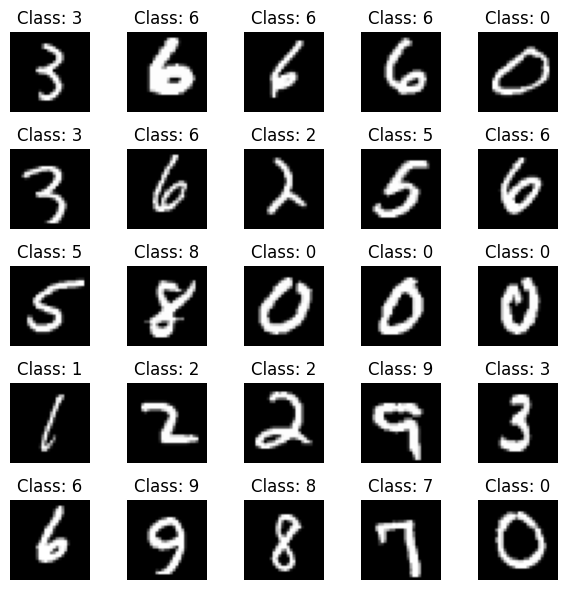

In [4]:
#Note: Step 2
#   Displaying Random Digits

rows = 5
digits_per_row = 5
#Note: figsize - Ορίζει το μέγεθος της φιγούρας σε ίντσες. Στο συγκεκριμένο παράδειγμα, η φιγούρα θα έχει πλάτος 6 ίντσες και ύψος 6 ίντσες.
fig,axes = plt.subplots(nrows=rows,ncols=digits_per_row,figsize=(6,6))
#Note: Η μέθοδος flatten μετατρέπει αυτόν τον δισδιάστατο πίνακα σε μονοδιάστατο πίνακα.
axes = axes.flatten()

#Note: Select random ids from 0 to 60'000
#Note: replace=False σημαίνει ότι η επιλογή θα γίνει χωρίς επανάληψη, δηλαδή κάθε δείγμα θα επιλεγεί το πολύ μία φορά.
total_digits = rows * digits_per_row
random_ids = np.random.choice(x_train.shape[0],total_digits,replace=False)

#Plotting the selected digits.
for i,ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx],cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [5]:
#Note: Step 3
#   Preprocessing Inputs
'''
Μετατρέπει τις ετικέτες y_train από αριθμητικές τιμές σε μορφή one-hot encoding.
Οι ετικέτες στο MNIST dataset είναι αρχικά αριθμητικές τιμές από 0 έως 9.
Η μέθοδος tf.one_hot δημιουργεί ένα διάνυσμα μήκους depth (σε αυτή την περίπτωση 10), όπου το στοιχείο που αντιστοιχεί στην αρχική ετικέτα είναι 1 και όλα τα άλλα στοιχεία είναι 0.
Για παράδειγμα, αν η αρχική ετικέτα είναι 3, το one-hot encoded διάνυσμα θα είναι [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
'''
x_train = x_train.reshape((60000,784))
y_train = tf.one_hot(y_train,depth=10)
x_test = x_test.reshape((10000,784))
y_test = tf.one_hot(y_test,depth=10)



In [6]:
#Note: Step 4
#   Construct Deep Neural Network
#   Inpuit: 784 Features
#   Hiddens: 3 Hiddens of 256,128,64 units, will pass through tanh activation.
#   Output: 10 probabilities (1 for each class).
#   Softmax activation is required to convert the network's outputs into probabilities

activation = 'relu' #'sigmoid'
loss = 'categorical_crossentropy' #Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate) #Do not change this optimizer
epochs = 10 #50

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,),name='input'),
    tf.keras.layers.Dense(units=256,activation=activation,name='hidden-1'),
    tf.keras.layers.Dense(units=128,activation=activation,name='hidden-2'),
    tf.keras.layers.Dense(units=64,activation=activation,name='hidden-3'),
    tf.keras.layers.Dense(units= 10,activation='softmax',name='ouputs') #Do not change this activation function
])

model.summary(expand_nested=True)

model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
history = model.fit(x=x_train,y=y_train,epochs=epochs,validation_data=(x_test,y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 hidden-2 (Dense)            (None, 128)               32896     
                                                                 
 hidden-3 (Dense)            (None, 64)                8256      
                                                                 
 ouputs (Dense)              (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9099 - accuracy: 0.8467 - val_loss: 0.3509 - val_accuracy: 0.9021
Epo

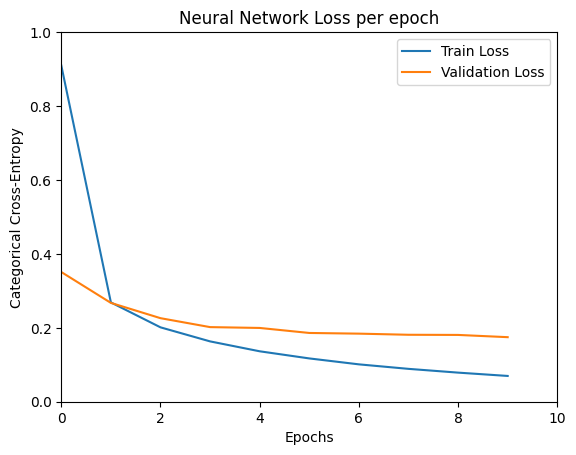

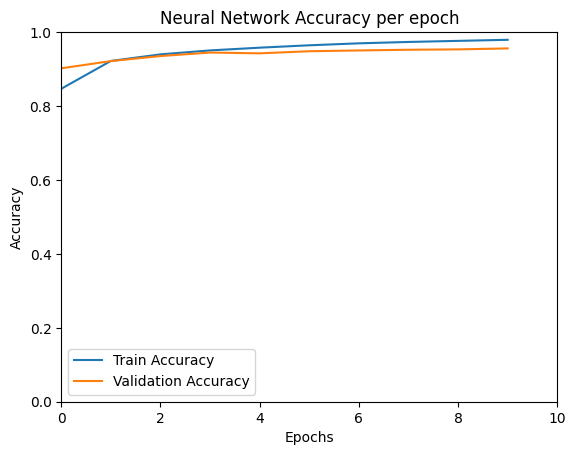

In [7]:
#Note: Step 5
#   Display Loss and Accuracy per Training epoch

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(train_loss,label='Train Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0,epochs)
plt.ylim(0,1)
plt.legend()
plt.show()


plt.plot(train_acc,label='Train Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0,epochs)
plt.ylim(0,1)
plt.legend()
plt.show()



313/313 [==============================] - 2s 6ms/step
Πρώτες 10 πραγματικές ετικέτες: [7 2 1 0 4 1 4 9 5 9]
Πρώτες 10 προβλεπόμενες ετικέτες: [7 2 1 0 4 1 4 9 4 9]
Μάσκα λανθασμένων προβλέψεων: [False False False False False False False False  True False]
Δείκτες λανθασμένων προβλέψεων: [   8   36   44   98  149  151  175  193  225  233  241  245  247  259
  320  321  324  326  341  433  445  447  448  449  495  542  578  582
  591  625  646  659  667  691  707  716  717  720  726  740  801  844
  882  924  932  947  951  952  956  969  992 1014 1032 1039 1050 1101
 1112 1128 1131 1173 1181 1192 1198 1200 1224 1226 1228 1232 1242 1247
 1260 1289 1319 1328 1354 1364 1378 1391 1394 1395 1444 1447 1469 1476
 1494 1496 1500 1522 1527 1530 1549 1553 1554 1569 1570 1601 1609 1640
 1681 1686 1709 1732 1751 1754 1765 1781 1782 1790 1800 1823 1828 1850
 1868 1880 1901 1903 1913 1938 1952 1965 1970 2004 2016 2018 2024 2040
 2044 2052 2053 2063 2070 2093 2109 2129 2130 2135 2174 2182 2186 2189
 

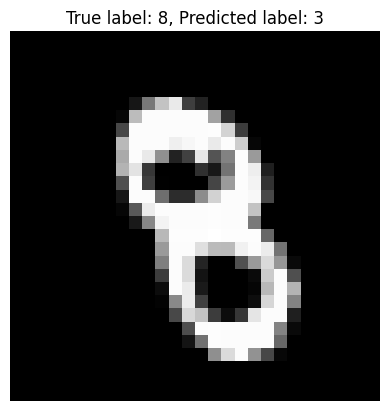

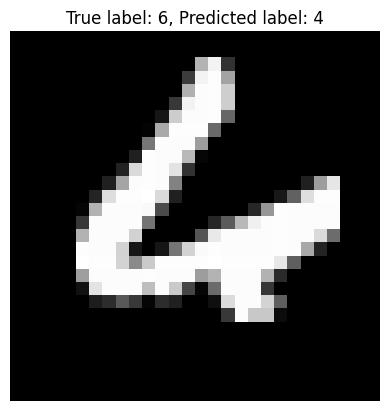

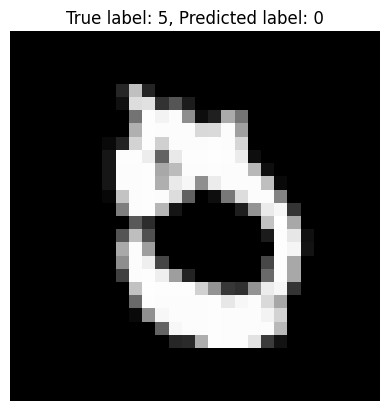

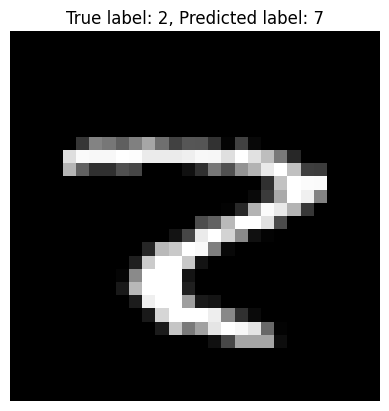

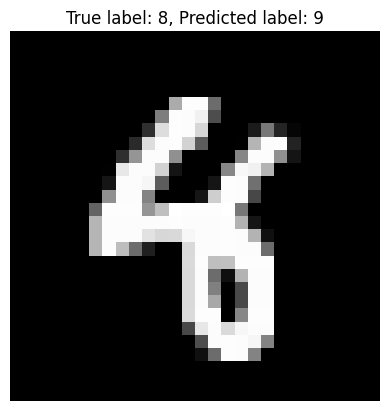

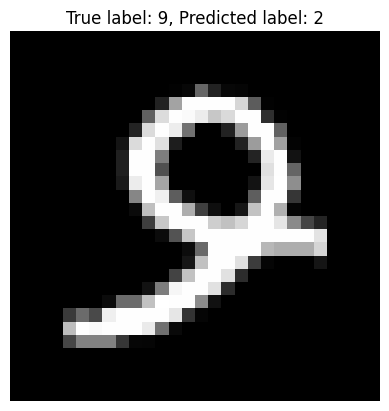

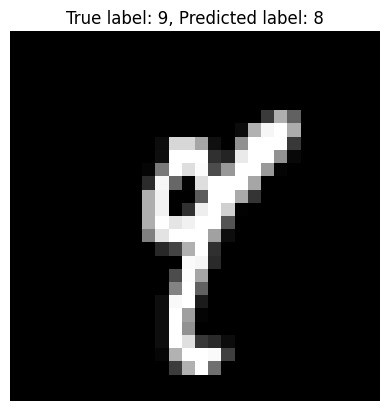

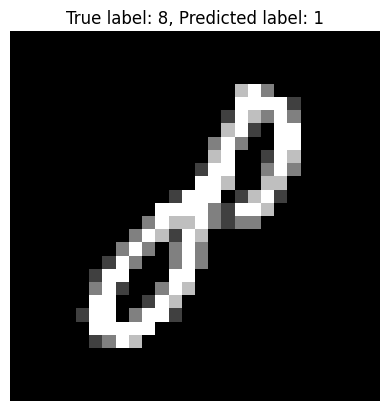

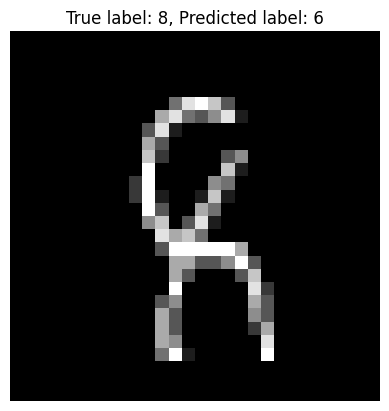

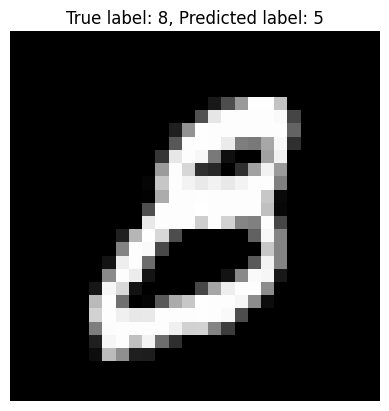

In [8]:
# Step 6
# Display one wrong prediction for each digit class...
#
# Προβλέψεις του μοντέλου
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Μετατροπή των πραγματικών ετικετών σε κανονικές ετικέτες (αν είναι one-hot encoded)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Εκτύπωση μερικών από τις προβλέψεις και τις πραγματικές ετικέτες για έλεγχο
print("Πρώτες 10 πραγματικές ετικέτες:", y_test[:10])
print("Πρώτες 10 προβλεπόμενες ετικέτες:", predicted_labels[:10])

# Έλεγχος αντιστοίχισης προβλέψεων με τις πραγματικές ετικέτες
incorrect_mask = y_test != predicted_labels
print("Μάσκα λανθασμένων προβλέψεων:", incorrect_mask[:10])
incorrect_indexes = np.where(incorrect_mask)[0]
print("Δείκτες λανθασμένων προβλέψεων:", incorrect_indexes)

# Επιλογή τυχαίων λανθασμένων δειγμάτων
set = [0,1,2,3,4,5,6,7,8,9]

while (set != []):
    index = np.random.choice(incorrect_indexes)
    if(predicted_labels[index] in set):
        predicted_label = predicted_labels[index]
        set.remove(predicted_label)
        incorrect_image = x_test[index].reshape(28,28)
        incorrect_label = y_test[index]

    # Εμφάνιση της εικόνας του λανθασμένου δείγματος
        plt.imshow(incorrect_image, cmap='gray')
        plt.title(f"True label: {incorrect_label}, Predicted label: {predicted_label}")
        plt.axis('off')
        plt.show()


In [9]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
